In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
cp= pd.read_excel("C:/Users/Happy/Desktop/capstone/Copper industrials/Copper_Set.xlsx")

In [3]:
cp.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
cp.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [6]:
cp.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [3]:
cp["item_date"]=pd.to_datetime(cp["item_date"],format="%Y%m%d",errors="coerce").dt.date
cp["delivery date"]=pd.to_datetime(cp["delivery date"],format="%Y%m%d",errors="coerce").dt.date

In [8]:
cp.describe().T

,count,mean,std,min,25%,50%,75%,max
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


In [4]:
con_to_numeric=["customer","country","application","thickness","width","product_ref","selling_price","quantity tons"]
cp[con_to_numeric]=cp[con_to_numeric].apply(pd.to_numeric,errors="coerce")

In [5]:
cp["material_ref"]=cp["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x)

In [6]:
cp.drop(columns=["id","material_ref"],inplace=True)

In [7]:
cp.isna().sum()

item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

Handelling the null values by filling with mean and mode values

In [8]:
fill_mean=["quantity tons","thickness","width","selling_price"]
means=cp[fill_mean].mean()
cp[fill_mean]=cp[fill_mean].fillna(means)

In [9]:
fill_mode=["item_date","customer","country","status","application","delivery date"]
mode=cp[fill_mode].mode().iloc[0]
cp[fill_mode]=cp[fill_mode].fillna(mode)

In [10]:
cp.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [11]:
cp["country"]=cp["country"].astype(np.int64)

In [12]:
cp.dtypes

item_date         object
quantity tons    float64
customer         float64
country            int64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [13]:
cp.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181673.0,5.874926e+03,2.349075e+06,-2000.00,1.097037e+01,3.036499e+01,6.716130e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489812e+01,2.440579e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181673.0,2.561375e+01,1.775391e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564827e+00,6.572303e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,1.918036e+03,3.317947e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [14]:

def out_skew(df,column):
    #skewness
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.kdeplot(df[column])
    plt.title("Skewness of"+" "+column)

    #outlier
    plt.subplot(1,2,2)
    sns.boxplot(df[column])
    plt.title("outlier of"+" "+column)


    plt.tight_layout()
    plt.show()



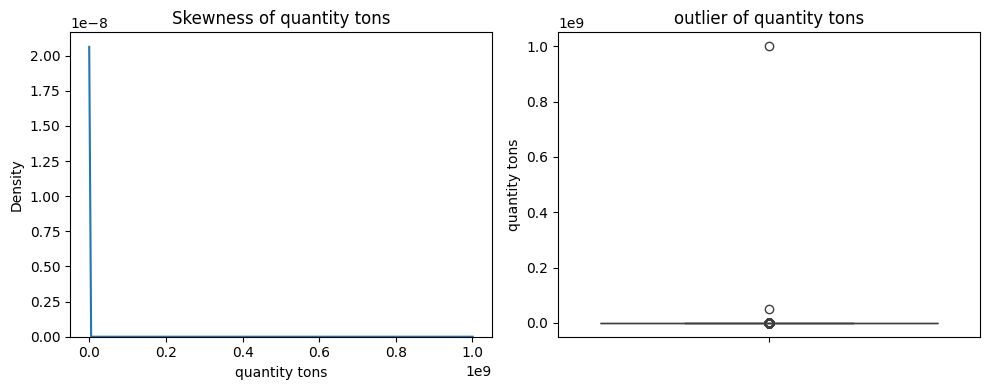

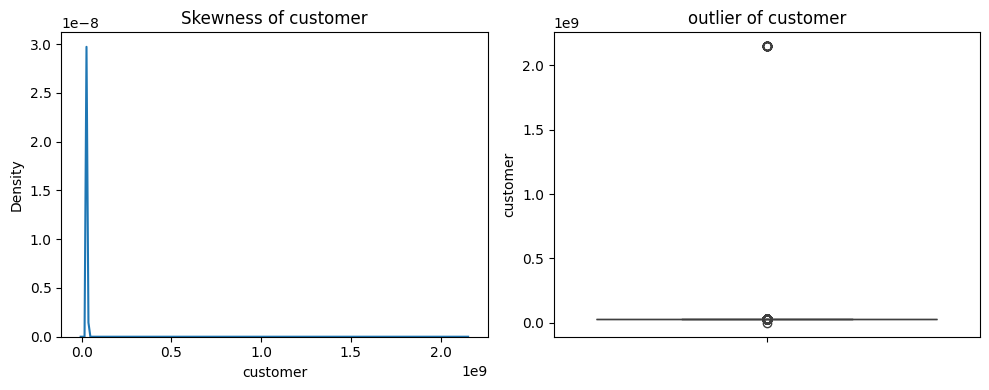

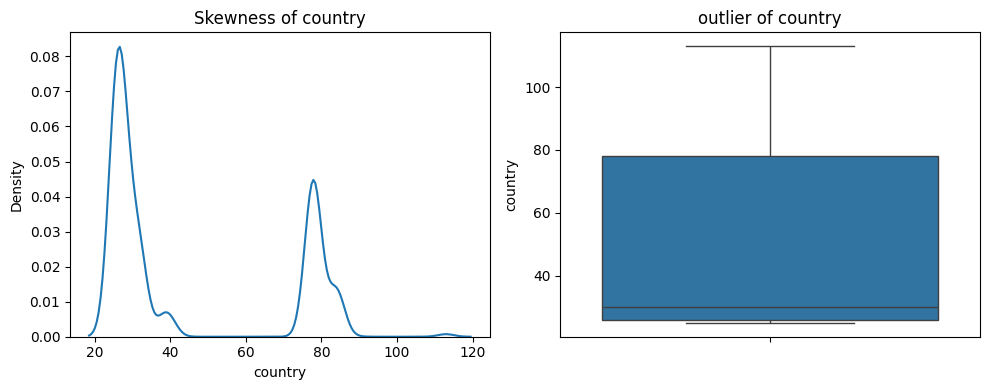

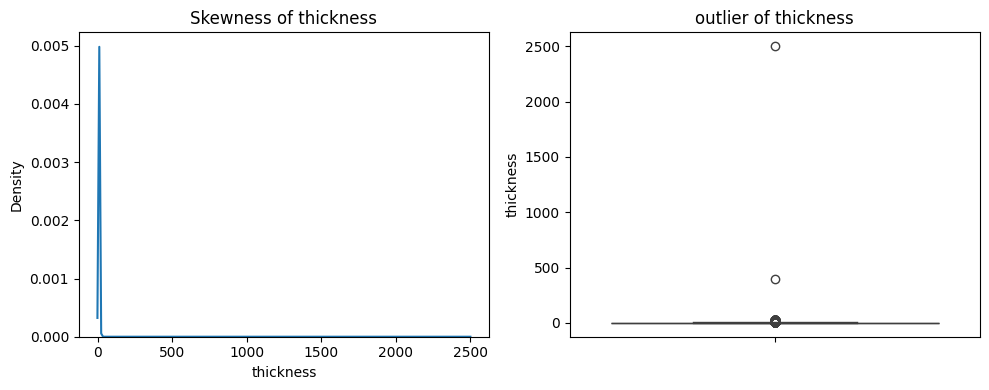

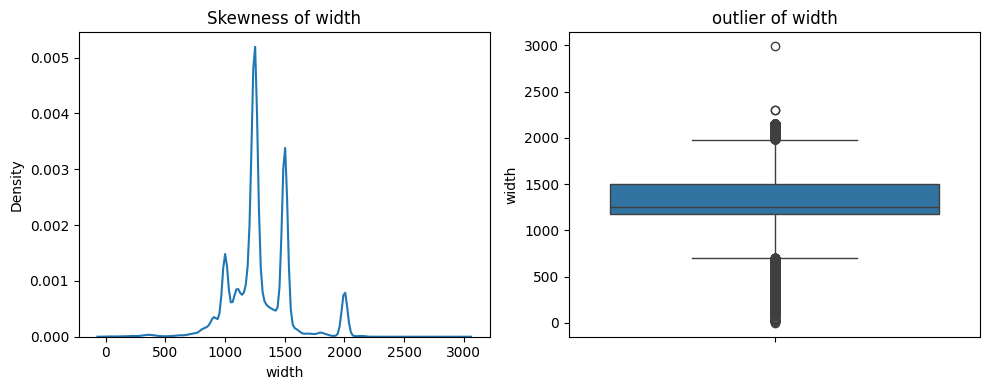

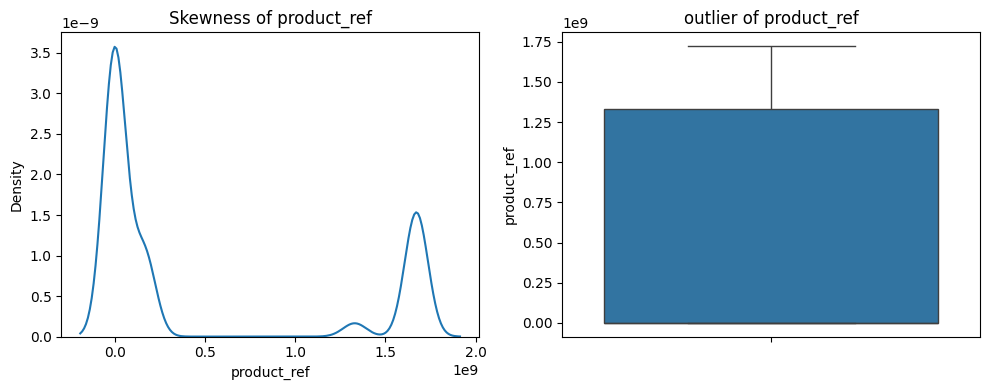

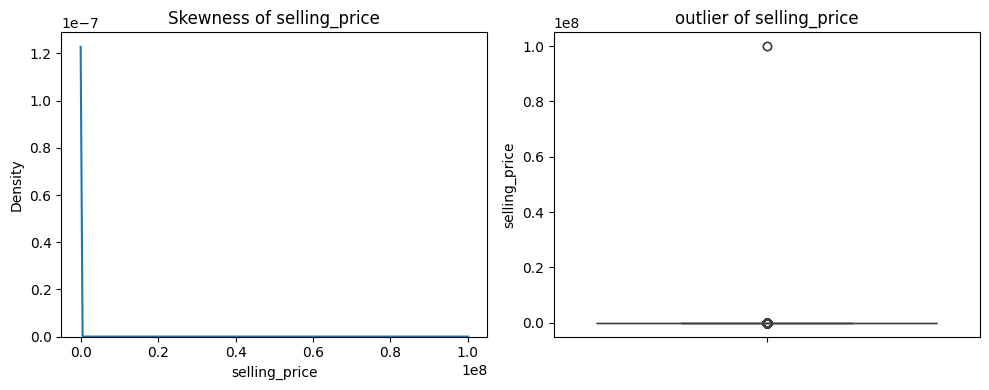

In [15]:
columns=['quantity tons', 'customer', 'country','thickness', 'width', 'product_ref','selling_price']
for i in columns:
  out_skew(cp,i)

In [22]:
cp[columns].skew()

quantity tons    424.690816
customer          86.985308
country            0.753090
thickness        303.447634
width              0.374597
product_ref        1.015216
selling_price    301.388088
dtype: float64

In [16]:
cp_out_sk= cp.copy(True)

In [17]:
cp_out_sk.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price'],
      dtype='object')

In [18]:
cp_out_sk.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181673.0,5.874926e+03,2.349075e+06,-2000.00,1.097037e+01,3.036499e+01,6.716130e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489812e+01,2.440579e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181673.0,2.561375e+01,1.775391e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564827e+00,6.572303e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,1.918036e+03,3.317947e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


Insights for quantity tons

Outliers: The extremely high maximum value (1,000,000,000) compared to the mean (5874.926) and the third quartile (67.1613) indicates the presence of extreme outliers in the data and the minimum value is negative, which is unusual for a quantity column and could be an error

Skewness: The large difference between the mean and the median (30.36499) suggests that the data may be positively skewed. This leads to outliers

Data Range: The wide range from -2000 to 1,000,000,000 indicates a very large variation in the values, which is also reflected in the high SD


In [19]:
cp_out_sk.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

Handelling outliers and skewness by using Inter quartile range for continous data


In [20]:
def wisker(df,column):
    q1= df[column].quantile(0.25)
    q3= df[column].quantile(0.75)
    iqr= q3-q1
    lw= q1-1.5*iqr
    uw= q3+1.5*iqr

    df[column]= df[column].clip(lw, uw)

In [21]:
outlier_columns= ['quantity tons', 'thickness','selling_price','width']
for k in outlier_columns:
  wisker(cp_out_sk,k)

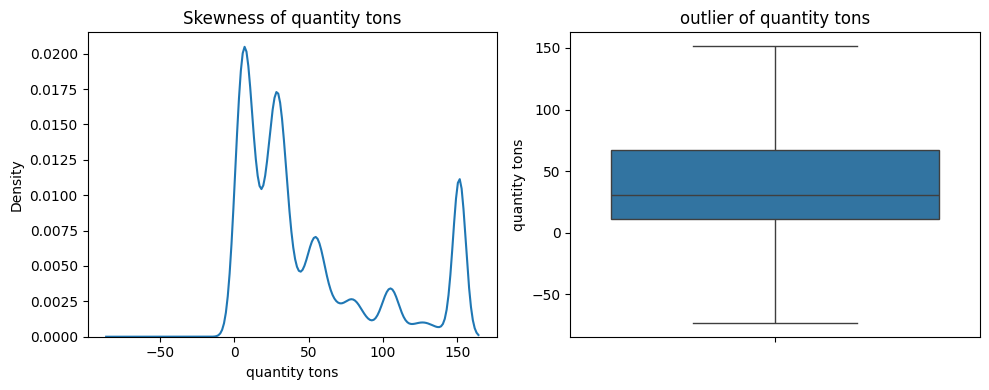

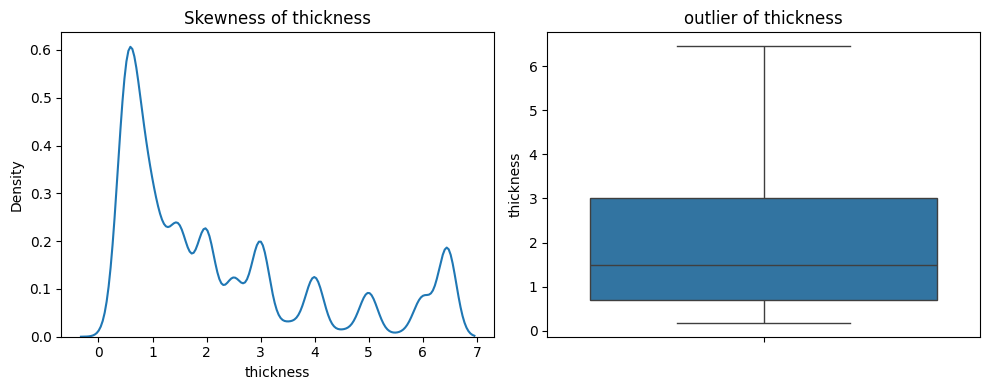

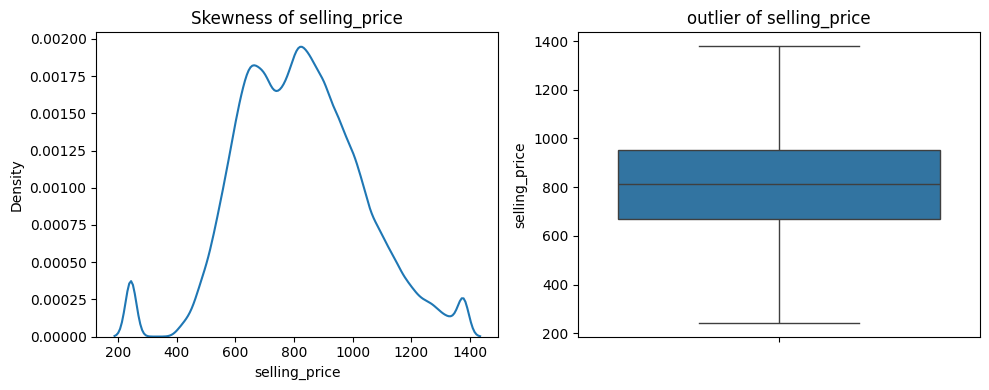

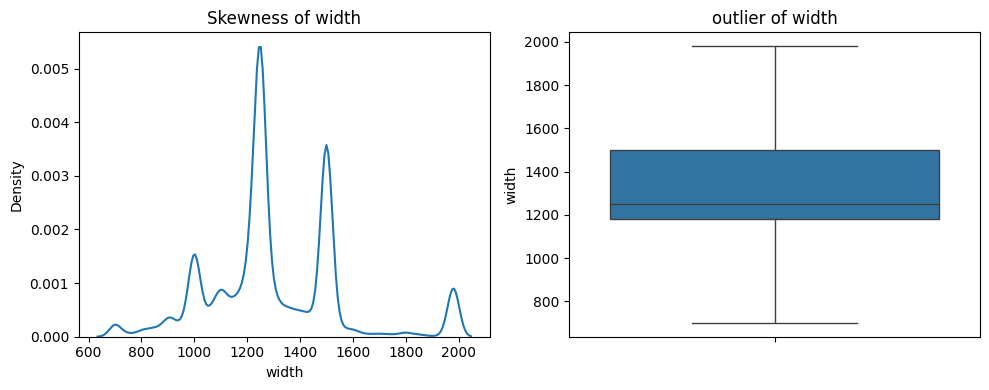

In [22]:
for i in outlier_columns:
    out_skew(cp_out_sk,i)

In [23]:
cp_out_sk[outlier_columns].skew()

quantity tons    1.121654
thickness        1.060935
selling_price    0.136602
width            0.667659
dtype: float64

In [24]:
model_data=cp_out_sk.copy(True)

In [25]:
model_data

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,151.447678,30202938.0,25,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,151.447678,30153963.0,30,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,151.447678,30349574.0,32,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,151.447678,30211560.0,28,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00
181669,2020-07-02,151.447678,30200854.0,25,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00
181670,2020-07-02,4.235594,30200854.0,25,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00
181671,2020-07-02,-73.316008,30200854.0,25,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00


In [26]:
model_data["delivery date"]= pd.to_datetime(model_data["delivery date"])
model_data["item_date"]= pd.to_datetime(model_data["item_date"])

In [27]:
model_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,151.447678,30202938.0,25,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,151.447678,30153963.0,30,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,151.447678,30349574.0,32,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,151.447678,30211560.0,28,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00


In [28]:
model_data['no_of_days']=(model_data['item_date']-model_data['delivery date']).abs().dt.days
model_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,no_of_days
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,2021-04-01,151.447678,30202938.0,25,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,2021-04-01,151.447678,30153963.0,30,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,90
3,2021-04-01,151.447678,30349574.0,32,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,90
4,2021-04-01,151.447678,30211560.0,28,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00,31


In [29]:
x=model_data[['application','thickness','width','selling_price','quantity tons','country','customer','product_ref','delivery date']].corr()

In [30]:
x

,application,thickness,width,selling_price,quantity tons,country,customer,product_ref,delivery date
application,1.000000,-0.163543,-0.198902,0.129890,0.095517,-0.019496,-0.010105,-0.131755,-0.078498
thickness,-0.163543,1.000000,0.419064,-0.363792,0.002781,-0.055497,0.021805,0.155789,0.042498
width,-0.198902,0.419064,1.000000,-0.173253,0.010394,0.054068,0.009585,-0.024106,0.026823
selling_price,0.129890,-0.363792,-0.173253,1.000000,-0.041768,-0.022226,-0.026025,-0.077861,0.529782
quantity tons,0.095517,0.002781,0.010394,-0.041768,1.000000,-0.090017,-0.001916,0.051463,0.016125
country,-0.019496,-0.055497,0.054068,-0.022226,-0.090017,1.000000,0.015935,-0.147482,-0.092279
customer,-0.010105,0.021805,0.009585,-0.026025,-0.001916,0.015935,1.000000,-0.007716,-0.002908
product_ref,-0.131755,0.155789,-0.024106,-0.077861,0.051463,-0.147482,-0.007716,1.000000,0.096195
delivery date,-0.078498,0.042498,0.026823,0.529782,0.016125,-0.092279,-0.002908,0.096195,1.000000


<Axes: >

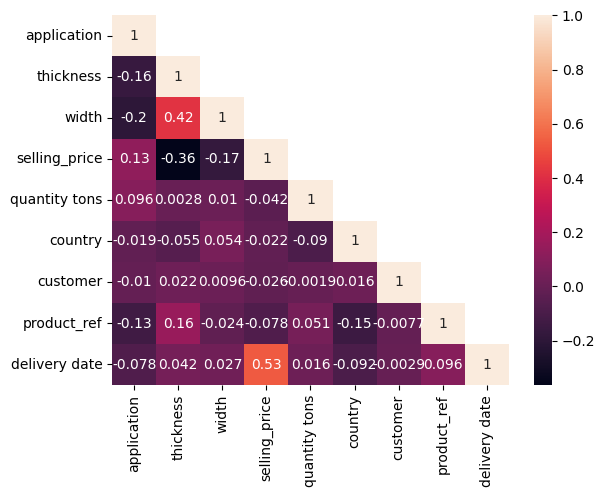

In [31]:
sns.heatmap(x, annot=True,mask=np.triu(x.corr(),+1))

Inference 
Positive correlation 0.42,0.53

Negative correlation -0.4

In [39]:
model_data['country'] = model_data['country'].astype(str)
country=model_data['country'].unique()
status=model_data['status'].unique()
item=model_data['item type'].unique()
print(country)
print(status)
print(item)

['28' '25' '30' '32' '38' '78' '27' '77' '113' '79' '26' '39' '40' '84'
 '80' '107' '89']
['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']


In [41]:
from sklearn.preprocessing import LabelEncoder

encode_country=LabelEncoder().fit(country)
transformed_country = encode_country.transform(country)

encode_status=LabelEncoder().fit(status)
transformed_status = encode_status.transform(status)

encode_item=LabelEncoder().fit(item)
transformed_item = encode_item.transform(item)

print(transformed_country)
print(transformed_status)
print(transformed_item)

[ 5  2  6  7  8 12  4 11  1 13  3  9 10 15 14  0 16]
[7 0 6 1 2 8 5 4 3]
[5 6 3 1 2 0 4]


In [37]:
for i,j in zip(country,transformed_country):
    print(i,'encoded :',j)

28 encoded : 5
25 encoded : 2
30 encoded : 6
32 encoded : 7
38 encoded : 8
78 encoded : 12
27 encoded : 4
77 encoded : 11
113 encoded : 1
79 encoded : 13
26 encoded : 3
39 encoded : 9
40 encoded : 10
84 encoded : 15
80 encoded : 14
107 encoded : 0
89 encoded : 16


In [42]:
model_data1=model_data.copy(True)

In [43]:
model_data

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,no_of_days
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,2021-04-01,151.447678,30202938.0,25,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,2021-04-01,151.447678,30153963.0,30,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,90
3,2021-04-01,151.447678,30349574.0,32,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,90
4,2021-04-01,151.447678,30211560.0,28,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,25,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,1
181669,2020-07-02,151.447678,30200854.0,25,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,1
181670,2020-07-02,4.235594,30200854.0,25,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,1
181671,2020-07-02,-73.316008,30200854.0,25,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00,1


In [44]:
import pickle

file_country="country.pkl"
file_status="status.pkl"
file_item="item.pkl"

with open(file_country, 'wb') as file:
    pickle.dump(encode_country, file)

with open(file_status,'wb') as file:
   pickle.dump(encode_status,file)

with open(file_item,"wb") as file:
    pickle.dump(encode_item,file)



In [45]:
with open(file_country, 'rb') as file:
    encode_country = pickle.load(file)

transformed_country= encode_country.transform(country)
transformed_country

array([ 5,  2,  6,  7,  8, 12,  4, 11,  1, 13,  3,  9, 10, 15, 14,  0, 16])

In [46]:
with open(file_status, 'rb') as file:
    encode_status = pickle.load(file)

transformed_status= encode_status.transform(status)
transformed_status

array([7, 0, 6, 1, 2, 8, 5, 4, 3])

In [47]:
with open(file_item, 'rb') as file:
    encode_item = pickle.load(file)

transformed_item= encode_item.transform(item)
transformed_item

array([5, 6, 3, 1, 2, 0, 4])

In [48]:
category=['status', 'item type','country']
for i in category:
    print(i)
    model_data[i] = LabelEncoder().fit_transform(model_data[i])
    print(model_data[i].unique())

status
[7 0 6 1 2 8 5 4 3]
item type
[5 6 3 1 2 0 4]
country
[ 5  2  6  7  8 12  4 11  1 13  3  9 10 15 14  0 16]


In [48]:
model_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,no_of_days
0,2021-04-01,54.151139,30156308.0,5,7,5,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,2021-04-01,151.447678,30202938.0,2,7,5,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,2021-04-01,151.447678,30153963.0,6,7,6,28.0,0.38,952.0,628377,2021-01-01,644.33,90
3,2021-04-01,151.447678,30349574.0,7,7,3,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,90
4,2021-04-01,151.447678,30211560.0,5,7,5,10.0,4.00,1980.0,640665,2021-03-01,577.00,31


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [50]:
x = model_data[[ 'quantity tons','thickness','width','country','status','item type', 'application','product_ref','no_of_days']].values
y = model_data[['selling_price']].values

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [51]:
et_model = ExtraTreesRegressor()
lin_model = LinearRegression()
dt_model = DecisionTreeRegressor()

In [52]:
et_model.fit(x_train, y_train)
lin_model.fit(x_train, y_train)
dt_model.fit(x_train, y_train)

et_preds = et_model.predict(x_test)
lin_preds= lin_model.predict(x_test)
dt_preds = dt_model.predict(x_test)

In [53]:
et_mse = mean_squared_error(y_test, et_preds)
et_mae = mean_absolute_error(y_test, et_preds)
et_r2 = r2_score(y_test, et_preds)

lin_mse = mean_squared_error(y_test, lin_preds)
lin_mae = mean_absolute_error(y_test, lin_preds)
lin_r2 = r2_score(y_test, lin_preds)

dt_mse = mean_squared_error(y_test, dt_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

In [55]:
print("ExtraTreesRegressor = MSE:",et_mse,",MAE :",et_mae,",R2 :",et_r2)
print("LinearRegression = MSE:",lin_mse,",MAE :",lin_mae,",R2 :",lin_r2)
print("DecisionTreeRegressor = MSE:",dt_mse,",MAE :",dt_mae,",R2 :",dt_r2)

ExtraTreesRegressor = MSE: 4536.685702126343 ,MAE : 41.19584937466625 ,R2 : 0.8963804520168809
LinearRegression = MSE: 31849.129633474233 ,MAE : 136.79231938408694 ,R2 : 0.272554319835389
DecisionTreeRegressor = MSE: 7819.275448412402 ,MAE : 47.66819595014798 ,R2 : 0.8214049108272501


ExtraTreesRegressor:

This model performs the best among the three, with the lowest errors (MSE and MAE) and the highest R². It is the most accurate and explains the most variance in the data.

In [56]:
et_model=et_model.fit(x_train, y_train)

In [57]:
file_et='Extratreeregressor.pkl'
with open(file_et, 'wb') as file:
    pickle.dump(et_model, file)


In [58]:
model_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,no_of_days
0,2021-04-01,54.151139,30156308.0,5,7,5,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,2021-04-01,151.447678,30202938.0,2,7,5,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,2021-04-01,151.447678,30153963.0,6,7,6,28.0,0.38,952.0,628377,2021-01-01,644.33,90
3,2021-04-01,151.447678,30349574.0,7,7,3,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,90
4,2021-04-01,151.447678,30211560.0,5,7,5,10.0,4.00,1980.0,640665,2021-03-01,577.00,31


In [60]:
input=np.array([[151.447678,.80,1210.0,2,7,5,41,1668701718,0]])
et_model1= et_model.predict(input)
print("Predicted selling price without Log: ",et_model1)

Predicted selling price without Log:  [1047.]


In [61]:
input=np.array([[151.447678,.38,952.0,6,7,6,28,628377,90]])
et_model1= et_model.predict(input)
print("Predicted selling price without Log: ",et_model1)

Predicted selling price without Log:  [644.33]


In [62]:
input=np.array([[160,.40,900.0,6,7,6,28,628377,90]])
et_model1= et_model.predict(input)
print("Predicted selling price without Log: ",et_model1)

Predicted selling price without Log:  [671.0106]


In [49]:
model_data1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,no_of_days
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,2021-04-01,151.447678,30202938.0,25,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,2021-04-01,151.447678,30153963.0,30,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,90
3,2021-04-01,151.447678,30349574.0,32,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,90
4,2021-04-01,151.447678,30211560.0,28,Won,W,10.0,4.00,1980.0,640665,2021-03-01,577.00,31


In [117]:
model_data2=model_data1[model_data1['status'].isin(['Won', 'Lost'])]

In [54]:
model_data2["status"].value_counts()

status
Won     116012
Lost     34438
Name: count, dtype: int64

In [57]:
status1=model_data2['status'].unique()

In [118]:
print(status1)

['Won' 'Lost']


In [60]:
encode_status1=LabelEncoder().fit(status1)
transformed_status1 = encode_status1.transform(status1)

In [119]:
file_status1="status1.pkl"

with open(file_status1,'wb') as file:
   pickle.dump(encode_status1,file)


In [120]:
with open(file_status1, 'rb') as file:
    encode_status1 = pickle.load(file)

transformed_status1= encode_status1.transform(status1)
transformed_status1

array([1, 0])

In [121]:
category1=['status','item type','country']
for i in category1:
    print(i)
    model_data2[i] = LabelEncoder().fit_transform(model_data2[i])
    print(model_data2[i].unique())

status
[1 0]
item type
[5 6 3 1 2 0 4]
country
[ 5  2  6  7  8 12  4 11  1 13  3  9 10 15 14 16  0]


In [122]:
model_data2

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,no_of_days
0,2021-04-01,54.151139,30156308.0,5,1,5,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,2021-04-01,151.447678,30202938.0,2,1,5,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,2021-04-01,151.447678,30153963.0,6,1,6,28.0,0.38,952.0,628377,2021-01-01,644.33,90
3,2021-04-01,151.447678,30349574.0,7,1,3,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,90
4,2021-04-01,151.447678,30211560.0,5,1,5,10.0,4.00,1980.0,640665,2021-03-01,577.00,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020-07-02,102.482422,30200854.0,2,1,5,41.0,0.96,1220.0,164141591,2020-07-01,591.00,1
181669,2020-07-02,151.447678,30200854.0,2,1,5,41.0,0.95,1500.0,164141591,2020-07-01,589.00,1
181670,2020-07-02,4.235594,30200854.0,2,1,5,41.0,0.71,1250.0,164141591,2020-07-01,619.00,1
181671,2020-07-02,-73.316008,30200854.0,2,1,5,41.0,0.85,1250.0,164141591,2020-07-01,601.00,1


In [124]:
model_data2 = model_data2.drop(columns=['item_date', 'delivery date'])

In [125]:
model_data2

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,no_of_days
0,54.151139,30156308.0,5,1,5,10.0,2.00,1500.0,1670798778,854.00,91
1,151.447678,30202938.0,2,1,5,41.0,0.80,1210.0,1668701718,1047.00,0
2,151.447678,30153963.0,6,1,6,28.0,0.38,952.0,628377,644.33,90
3,151.447678,30349574.0,7,1,3,59.0,2.30,1317.0,1668701718,768.00,90
4,151.447678,30211560.0,5,1,5,10.0,4.00,1980.0,640665,577.00,31
...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,2,1,5,41.0,0.96,1220.0,164141591,591.00,1
181669,151.447678,30200854.0,2,1,5,41.0,0.95,1500.0,164141591,589.00,1
181670,4.235594,30200854.0,2,1,5,41.0,0.71,1250.0,164141591,619.00,1
181671,-73.316008,30200854.0,2,1,5,41.0,0.85,1250.0,164141591,601.00,1


In [68]:
model_data2["status"].value_counts()

status
1    116012
0     34438
Name: count, dtype: int64

In [81]:
from imblearn.over_sampling import SMOTE

X = model_data2.drop(["status"], axis=1)
y = model_data2["status"]

In [82]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X,y)

In [83]:
y_res.value_counts()

status
1    116012
0    116012
Name: count, dtype: int64

In [84]:
y_res.shape

(232024,)

In [101]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
x1 = model_data2[[ 'quantity tons','thickness','width','selling_price','country','item type','application','product_ref','no_of_days']].values
y1 = model_data2[['status']].values


# Split the dataset into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=20)

In [94]:
rf_model = RandomForestClassifier()
xgb_cls_model = xgb.XGBClassifier()
dt_cls_model = DecisionTreeClassifier()

In [95]:
rf_model.fit(x1_train, y1_train)

RandomForestClassifier()

In [96]:
xgb_cls_model.fit(x1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [97]:
dt_cls_model.fit(x1_train, y1_train)

DecisionTreeClassifier()

In [98]:
rf_preds = rf_model.predict(x1_test)
xgb_cls_preds = xgb_cls_model.predict(x1_test)
dt_cls_preds = dt_cls_model.predict(x1_test)

In [104]:
print("RandomForest Classifier")
result = confusion_matrix(y1_test, rf_preds)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y1_test, rf_preds)
print("Classification Report:")
print(result1)

RandomForest Classifier
Confusion Matrix:
[[ 9076  1281]
 [  860 33918]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     10357
           1       0.96      0.98      0.97     34778

    accuracy                           0.95     45135
   macro avg       0.94      0.93      0.93     45135
weighted avg       0.95      0.95      0.95     45135



In [105]:
print("XGBClassifier")
result = confusion_matrix(y1_test, xgb_cls_preds)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y1_test, xgb_cls_preds)
print("Classification Report:")
print(result1)

XGBClassifier
Confusion Matrix:
[[ 7478  2879]
 [ 1477 33301]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.72      0.77     10357
           1       0.92      0.96      0.94     34778

    accuracy                           0.90     45135
   macro avg       0.88      0.84      0.86     45135
weighted avg       0.90      0.90      0.90     45135



In [106]:
print("DecisionTree Classifier")
result = confusion_matrix(y1_test, dt_cls_preds)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y1_test, dt_cls_preds)
print("Classification Report:")
print(result1)

DecisionTree Classifier
Confusion Matrix:
[[ 8817  1540]
 [ 1698 33080]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84     10357
           1       0.96      0.95      0.95     34778

    accuracy                           0.93     45135
   macro avg       0.90      0.90      0.90     45135
weighted avg       0.93      0.93      0.93     45135



The RandomForest Classifier performed very well with an overall accuracy of 95%

It is good at identifying the positive class1 with high precision 96% and recall 98%

The model also performs well on the negative class0 but with slightly lower precision 91% and recall 88%

The F1-scores indicate a balanced performance especially strong for class 1.

In [107]:
model_cls1=rf_model.fit(x1_train, y1_train)

In [135]:
rand_cls='randomforest_classification.pkl'
with open(rand_cls, 'wb') as file:
    pickle.dump(model_cls1, file)

In [130]:
model_data2['status'].unique()

array([1, 0])

In [131]:
status_with_value = model_data2[model_data2['status'] == 0]

In [132]:
status_with_value

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price,no_of_days
171,8.718789,30223403.0,12,0,5,10.0,1.00,1500.0,1668701718,1253.0,91
174,39.553513,30165992.0,11,0,3,10.0,1.00,1500.0,164141591,1225.0,122
175,11.454558,30223403.0,12,0,5,10.0,4.00,1500.0,1668701718,1186.0,91
176,37.655526,30165992.0,11,0,3,10.0,0.80,1250.0,164141591,1249.0,122
179,10.291602,30223403.0,12,0,5,10.0,0.80,1500.0,1668701718,1284.0,91
...,...,...,...,...,...,...,...,...,...,...,...
181527,63.859521,30161559.0,6,0,3,10.0,5.85,1525.0,640665,457.0,30
181529,56.028562,30161559.0,6,0,3,10.0,6.45,1500.0,640665,458.0,30
181531,151.447678,30161559.0,6,0,3,10.0,3.85,1830.0,640665,460.0,30
181533,102.993849,30198408.0,2,0,3,10.0,1.40,1150.0,1668701718,725.0,1


In [115]:
input1=np.array([[54.151139,2.00,1500.0,854.00,5,5,10,1670798778,91]])
ran_cls = model_cls1.predict(input1)
if ran_cls==1:
    print('The status is: Won')
else:
    print('The status is: Lost')


The status is: Won


In [133]:
input1=np.array([[106.151139,1.40,1146.0,727.00,2,3,10,1668701718,1]])
ran_cls = model_cls1.predict(input1)
if ran_cls==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Lost
